<a href="https://colab.research.google.com/github/AlineFontes/datasciencepuc/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = "/content/drive/My Drive/Colab Notebooks/winequality-red.csv"
input_df = pd.read_csv(file)

In [4]:
input_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
class MachineLearningPipeline:
  def __init__(self,df):
    self.df = df
  
  def dataCleaning(self):
    self.df.dropna()
    
  def selectColumns(self):
    self.X = self.df['fixed acidity'].values
    self.y = self.df['quality'].values

  def selectColumnsDF(self):
    self.df['fixed acidity'] = np.log(self.df['fixed acidity'])
    self.df['quality'] = np.log(self.df['quality'])
    self.df = self.df[['fixed acidity', 'quality']].values
  

  def selectColumn(self):
    self.X = self.df['fixed acidity'].values
    self.y = self.df['quality'].values
    
  
  def trainTestSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)


In [8]:
pipeline = MachineLearningPipeline(input_df)
pipeline.dataCleaning()
pipeline.selectColumn()
pipeline.trainTestSplit()

Regressão Univariável


In [9]:
pipeline.df[['fixed acidity', 'quality']]

,fixed acidity,quality
0,7.4,5
1,7.8,5
2,7.8,5
3,11.2,6
4,7.4,5
...,...,...
1594,6.2,5
1595,5.9,6
1596,6.3,6
1597,5.9,5


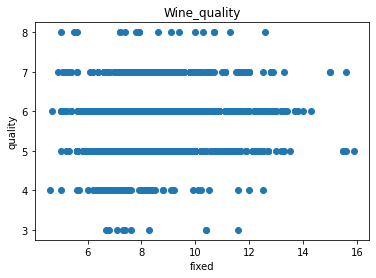

In [10]:
plt.scatter(pipeline.X,pipeline.y)
plt.title('Wine_quality')
plt.xlabel('fixed')
plt.ylabel('quality')
plt.show()

In [11]:
def plot_regression_line(x, y, theta0, theta1):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = theta0 + theta1*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

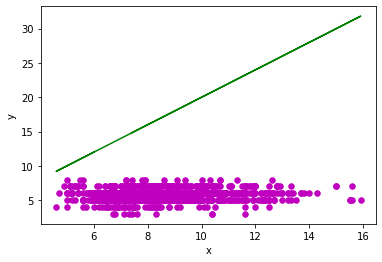

In [12]:
plot_regression_line(pipeline.X,pipeline.y,0,2)

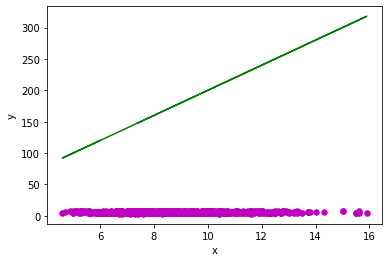

In [13]:
plot_regression_line(pipeline.X,pipeline.y,0,20)

In [14]:
def funcao_custo(theta0, theta1, X, y):
  m = len(X)
  elem = list(range(1,m))

  J = (1/2*m) * sum([(theta0 + theta1*X[i]) - y[i] for i in elem]) ** 2
  return J

In [15]:
def hypothesis(theta0, theta1, X):
    return theta0 + theta1*X

In [16]:
def gradient_descent(X, y, alpha, num_iteracoes):
  theta0 = 0
  theta1 = 0

  m = len(y)
  errors = []
  for i in range(0,num_iteracoes):
    h_theta = hypothesis(theta0, theta1, X)
    theta0 -= alpha*(sum(h_theta-y))/m
    theta1 -= alpha * (np.sum((h_theta - y) * X)/m)
    errors.append(funcao_custo(theta0, theta1, X, y))
  return theta0, theta1, errors

In [17]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.01, 50)

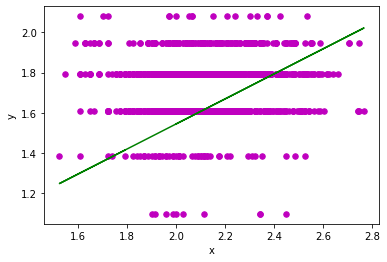

In [18]:
plot_regression_line(np.log(pipeline.X), np.log(pipeline.y),result[0],result[1])

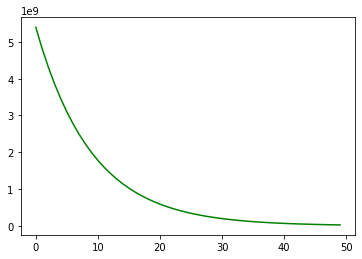

In [19]:
plt.plot(result[2], color = "g")

In [20]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.001, 50)

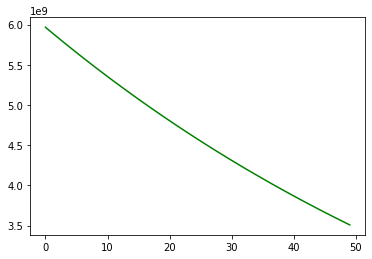

In [21]:
plt.plot(result[2], color = "g")